# DecisionTree for football stats match prediction

In [2]:
import pandas as pd

df_games_stats_ext = pd.read_csv("../data/data_extended.csv", index_col=0)

print(df_games_stats_ext.shape)

(1282, 22)


In [3]:
df_games_stats_ext.isnull().sum()

team_ids                0
round_ids               0
shots_total             0
shots_ongoal           46
shots_offgoal          12
shots_insidebox         8
shots_outsidebox       26
passes_total            4
passes_percentage       6
attacks_total           2
attacks_dangerous       2
fouls                  46
corners                14
possession_time         0
yellow_cards          198
red_cards            1180
saves                  94
substitutions          16
tackles                16
penalties            1080
injuries              780
results                 0
dtype: int64

In [4]:
df_games_stats_ext.fillna(0, inplace=True)
df_games_stats_ext.isnull().sum()

team_ids             0
round_ids            0
shots_total          0
shots_ongoal         0
shots_offgoal        0
shots_insidebox      0
shots_outsidebox     0
passes_total         0
passes_percentage    0
attacks_total        0
attacks_dangerous    0
fouls                0
corners              0
possession_time      0
yellow_cards         0
red_cards            0
saves                0
substitutions        0
tackles              0
penalties            0
injuries             0
results              0
dtype: int64

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

def game_output_results():
    df = pd.DataFrame()
    df["total"] = df_games_stats_ext.groupby("results").size()

    df.drop(index=-1, inplace=True)
    df.rename(index={0: "draw", 1: "win_or_loss"}, inplace=True)

    df.iloc[0]["total"] = df.iloc[0]["total"]/2

    df["percentage"] = round(df["total"] / (df_games_stats_ext.shape[0]//2) * 100)

    print(f"{df}\n")
    print(f"Total games: {df_games_stats_ext.shape[0]//2}")

    df["total"].plot(kind="bar", title="Output of games")
    plt.show()

             total  percentage
results                       
draw           154        24.0
win_or_loss    487        76.0

Total games: 641


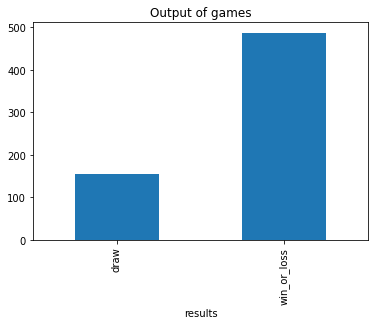

In [6]:
game_output_results()

In [7]:
df_games_stats_ext

,team_ids,round_ids,shots_total,shots_ongoal,shots_offgoal,shots_insidebox,shots_outsidebox,passes_total,passes_percentage,attacks_total,...,corners,possession_time,yellow_cards,red_cards,saves,substitutions,tackles,penalties,injuries,results
0,273,194968,-11,-2.0,-9.0,-4.0,-6.0,-202.0,-10.47,-18.0,...,-4.0,-22,1.0,1.0,2.0,3.0,-8.0,0.0,0.0,-1
1,62,194968,11,2.0,9.0,4.0,6.0,202.0,10.47,18.0,...,4.0,22,-1.0,-1.0,-2.0,-3.0,8.0,0.0,0.0,1
2,496,194968,-5,0.0,-5.0,-1.0,-5.0,-44.0,-5.46,-42.0,...,-3.0,-8,1.0,0.0,2.0,-1.0,-6.0,0.0,0.0,1
3,258,194968,5,0.0,5.0,1.0,5.0,44.0,5.46,42.0,...,3.0,8,-1.0,0.0,-2.0,1.0,6.0,0.0,0.0,-1
4,282,194968,4,-2.0,6.0,3.0,2.0,201.0,16.08,27.0,...,0.0,22,-3.0,0.0,0.0,0.0,-2.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,1703,194388,-16,-4.0,-12.0,-10.0,-3.0,-289.0,-21.21,-55.0,...,-8.0,-38,0.0,0.0,2.0,1.0,1.0,0.0,1.0,-1
1278,1789,194388,-9,-4.0,-5.0,-6.0,-3.0,-264.0,-9.16,-31.0,...,-6.0,-28,0.0,0.0,2.0,-1.0,8.0,0.0,1.0,-1
1279,86,194388,9,4.0,5.0,6.0,3.0,264.0,9.16,31.0,...,6.0,28,0.0,0.0,-2.0,1.0,-8.0,0.0,-1.0,1
1280,2650,194388,1,-1.0,2.0,7.0,-3.0,-65.0,-4.16,10.0,...,-1.0,-10,0.0,0.0,0.0,1.0,-4.0,1.0,2.0,0


In [8]:
df_team_stats = pd.DataFrame()

for col in df_games_stats_ext.columns[2:]:
    df_team_stats[str(col)] = df_games_stats_ext.groupby("team_ids").sum()[str(col)]
    
df_team_stats

,shots_total,shots_ongoal,shots_offgoal,shots_insidebox,shots_outsidebox,passes_total,passes_percentage,attacks_total,attacks_dangerous,fouls,corners,possession_time,yellow_cards,red_cards,saves,substitutions,tackles,penalties,injuries,results
team_ids,,,,,,,,,,,,,,,,,,,,
53,351,122.0,207.0,170.0,158.0,11461.0,675.71,1718.0,1031.0,5.0,94.0,1242,-22.0,0.0,-94.0,21.0,-224.0,-2.0,-5.0,17
62,323,121.0,197.0,241.0,99.0,10887.0,648.20,1199.0,1175.0,-52.0,101.0,1180,-28.0,-4.0,-38.0,0.0,-80.0,4.0,-3.0,32
66,16,33.0,-11.0,67.0,-57.0,-1143.0,-58.29,-452.0,-14.0,-10.0,34.0,-78,5.0,-3.0,-5.0,-17.0,37.0,2.0,-2.0,7
85,102,37.0,47.0,118.0,-26.0,7762.0,453.09,2029.0,712.0,-263.0,-2.0,850,-39.0,1.0,-19.0,-20.0,-95.0,5.0,15.0,18
86,-152,-51.0,-93.0,-133.0,-21.0,617.0,13.90,-802.0,-478.0,34.0,-56.0,58,16.0,1.0,32.0,4.0,-1.0,-3.0,-4.0,-12
180,-85,-7.0,-81.0,-33.0,-46.0,-2379.0,-134.95,-9.0,94.0,-46.0,-1.0,-270,-3.0,3.0,-15.0,-5.0,12.0,2.0,1.0,-12
211,-166,-91.0,-70.0,-88.0,-77.0,-6983.0,-374.18,-1055.0,-208.0,64.0,-105.0,-768,4.0,0.0,60.0,-8.0,104.0,5.0,-2.0,-12
246,-149,-62.0,-85.0,-101.0,-52.0,-1457.0,-88.06,-334.0,-500.0,100.0,-79.0,-164,30.0,2.0,25.0,13.0,43.0,-5.0,3.0,-10
258,15,0.0,10.0,-29.0,9.0,-2321.0,-139.09,244.0,108.0,62.0,36.0,-224,2.0,0.0,8.0,8.0,211.0,-2.0,3.0,-5


In [9]:
predictors = df_games_stats_ext.columns[2:-1]
col_to_remove = {"substitutions", "injuries", "tackles", "fouls", "yellow_cards"}
predictors = list(set(predictors) - col_to_remove)
print(predictors)

['saves', 'penalties', 'passes_total', 'shots_insidebox', 'shots_outsidebox', 'passes_percentage', 'shots_ongoal', 'shots_offgoal', 'possession_time', 'red_cards', 'corners', 'shots_total', 'attacks_total', 'attacks_dangerous']


In [10]:
for col in predictors: # Loop through all columns in predictors
    if df_games_stats_ext[col].dtype == 'object':  # check if column's type is object (text)
        df_games_stats_ext[col] = pd.Categorical(df_games_stats_ext[col]).codes  # convert text to numerical

df_games_stats_ext.head()
df_games_stats_ext.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1282 entries, 0 to 1281
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   team_ids           1282 non-null   int64  
 1   round_ids          1282 non-null   int64  
 2   shots_total        1282 non-null   int64  
 3   shots_ongoal       1282 non-null   float64
 4   shots_offgoal      1282 non-null   float64
 5   shots_insidebox    1282 non-null   float64
 6   shots_outsidebox   1282 non-null   float64
 7   passes_total       1282 non-null   float64
 8   passes_percentage  1282 non-null   float64
 9   attacks_total      1282 non-null   float64
 10  attacks_dangerous  1282 non-null   float64
 11  fouls              1282 non-null   float64
 12  corners            1282 non-null   float64
 13  possession_time    1282 non-null   int64  
 14  yellow_cards       1282 non-null   float64
 15  red_cards          1282 non-null   float64
 16  saves              1282 

In [11]:
from sklearn.model_selection import train_test_split

y = pd.DataFrame(data=df_games_stats_ext["results"])
x = pd.DataFrame(data=df_games_stats_ext[predictors])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

train shape (897, 14) (897, 1)
test shape (385, 14) (385, 1)


In [12]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=1)
clf_dt.fit(X_train, y_train)
train_score = clf_dt.score(X_train, y_train)
test_score = clf_dt.score(X_test, y_test)
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

train accuracy = 1.0
test accuracy = 0.5402597402597402


In [13]:
y_pred = clf_dt.predict(X_test)
print (y_pred)

[ 1  0 -1  1  0  0  0  1  1  1 -1 -1  1  1  1 -1  1 -1  1 -1  0 -1 -1  0
  0  0  1  0  1 -1 -1  0 -1  1  0  0  1 -1  1 -1 -1  0  1  1  1  0 -1  1
  0 -1 -1  1  0 -1  0  1  1  0  1  1 -1  0  1  0  0  1 -1 -1  0  1  1 -1
  0  0  0  0 -1 -1  1  0  0 -1 -1  1 -1  1  0  1  1 -1  0  1  0 -1  1  0
  0  0  1 -1  1 -1  0  0  0 -1 -1  1 -1  0  0 -1 -1  1  1 -1 -1  1 -1  1
 -1 -1  1 -1  1 -1  1 -1 -1 -1 -1  0 -1  0  0  0  1 -1 -1  0  1  0  1  1
  1 -1  0 -1  0  0 -1  1 -1  0  0  1  1 -1  1  1  1  0  1 -1  1  1  0  1
  0 -1  1 -1 -1 -1  0 -1  1  0  1 -1 -1  0  1  0 -1 -1  1  1  1 -1  0  0
 -1 -1  1  0  0 -1  0  0  1  0  0 -1 -1  1 -1  1 -1  1 -1 -1 -1 -1  0 -1
  1 -1  1 -1 -1 -1 -1 -1  0 -1  1 -1  1  1  0 -1  1  1  0 -1 -1  1 -1  1
  1  1  0 -1  0  0 -1  0 -1  0  1  0 -1  1  0  1  1  0  1 -1  0  1 -1  0
  1  1  1  0  1 -1  1  1 -1 -1  0 -1  0  1 -1 -1 -1  0  1  1 -1  0 -1 -1
  1 -1  1 -1 -1  0 -1  1  0 -1  1  1  1  1  0  1  1  0  0  0  0  1  0  1
 -1 -1  1 -1  0  1 -1 -1  0  1  1 -1  1  1  1 -1  1

In [14]:
y_prob = clf_dt.predict_proba(X_test)
print (y_prob)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [15]:
clf_dt = DecisionTreeClassifier(random_state=1, max_depth=3, min_samples_split=20, min_samples_leaf=5)
clf_dt.fit(X_train, y_train)

train_accuracy = clf_dt.score(X_train, y_train)
test_accuracy = clf_dt.score(X_test, y_test)

print ('train accuracy =', train_accuracy)
print ('test accuracy =', test_accuracy)

# Cross validation
from sklearn.model_selection import cross_val_score
scores_dt = cross_val_score(clf_dt, df_games_stats_ext[predictors], df_games_stats_ext["results"], scoring='accuracy', cv=5)
print('cross validation accuracy =', scores_dt.mean())

train accuracy = 0.6231884057971014
test accuracy = 0.6337662337662338
cross validation accuracy = 0.605298516536965


In [16]:
from sklearn.model_selection import GridSearchCV

max_depth_range = [i for i in range(1, 10)]
min_samples_leaf_range = [i for i in range(5, 100, 10)]
min_samples_split = [i for i in range(10, 200, 20)]

tree_param = [{'max_depth': max_depth_range,
              'min_samples_leaf': min_samples_leaf_range,
              'min_samples_split': min_samples_split}]

clf_gs = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=5)
clf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'min_samples_leaf': [5, 15, 25, 35, 45, 55, 65, 75,
                                               85, 95],
                          'min_samples_split': [10, 30, 50, 70, 90, 110, 130,
                                                150, 170, 190]}])

In [17]:
print(clf_gs.best_score_)
print(clf_gs.best_params_)

0.5897454996896337
{'max_depth': 4, 'min_samples_leaf': 25, 'min_samples_split': 10}


In [18]:
clf_dt2 = DecisionTreeClassifier(random_state=1, max_depth=clf_gs.best_params_["max_depth"], min_samples_leaf=clf_gs.best_params_["min_samples_leaf"],
    min_samples_split=clf_gs.best_params_["min_samples_split"])

clf_dt2.fit(X_train, y_train.values.ravel())
print ('train accuracy =', clf_dt2.score(X_train, y_train))
print ('test accuracy =', clf_dt2.score(X_test, y_test))

scores_rf = cross_val_score(clf_dt2, df_games_stats_ext[predictors], df_games_stats_ext["results"], scoring = 'accuracy', cv = 5)
print('cross validation accuracy =', scores_rf.mean())

train accuracy = 0.6376811594202898
test accuracy = 0.6285714285714286
cross validation accuracy = 0.5982946254863813


<AxesSubplot:title={'center':'Importance of features'}>

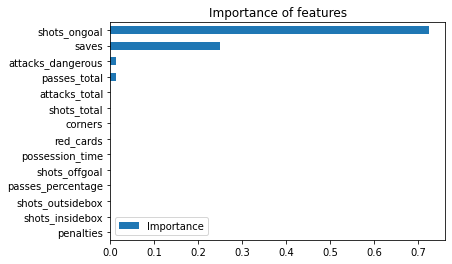

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

feat_imp = pd.DataFrame(clf_dt2.feature_importances_, predictors, columns=['Importance'])
feat_imp.sort_values('Importance', ascending=True).plot(kind="barh", title="Importance of features")